# Introduction // Introducción

A study wants to establish a model that allows calculating the probability that a passenger on the Titanic survives its sinking, depending on the age, sex and class in which the passenger was traveling. The survival variable is coded as 0 if the passenger did not survive and 1 if she survived.

The goal of this project is to scope, prep, analyze, and create a machine learning model to solve the question posed.

//

Un estudio quiere establecer un modelo que permita calcular la probabilidad de que un oasajero del Titanic sobreviva a su hundimiento, en función de la edad, el sexo y la clase en la que viajaba el pasajero. La variable de supervivencia está codificada como 0 si el pasajero no sobrevivió y 1 si sobrevivió.

La meta de este proyecto es monitorear, preparar, analizar y crear un modelo de Machine Learning para resolver la pregunta planteada.


### Data // Datos

The project has one data set provided by Kaggle called `passengers.csv`. In the data, each row represents a Titanic passenger and the columns are the characteristics.

//

El proyecto tiene un conjunto de datos extraidos de Kaggle llamados `passengers.csv`. En los datos, cada fila representa un pasajero del Titanic y las columnas son sus características. 

### Analysis // Análisis

We will use descriptive statistics and data visualization to find key figures in understanding the distribution, count, and relationship between variables. Since the goal of the project to make predictions on the user's variables, classification algorithms from the supervised learning family of machine learning models will be implemented. 

//

Utilizaremos estadísticas descriptivas y visualización de datos para encontrar cifras clave para comprender la distribución, el recuento y la relación entre las variables. Dado que el objetivo del proyecto es realizar predicciones sobre las variables del usuario, se implementarán algoritmos de clasificación supervisados de Machine Learning.


### Evaluation // Evaluación

The project will conclude with the evaluation of the machine learning models selected with their respective validation data set. The output of the predictions will be checked through a confusion matrix, and metrics such as accuracy, precision, recall, F1 and Kappa scores. 

//

El proyecto concluirá con la evaluación de los modelo de Machine Learning seleccionados con su respectivo conjunto de datos de validación. La salida de las predicciones se verificará a través de una matriz de confusión y métricas como exactitud, precisión, recuperación, puntuaciones F1 y Kappa.


## Import Python Modules //  Importar Módulos de Python

Principal modules being used for this project: // Módulos principales que se utilizan para este proyecto:

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

## Loading the Data // Cargando los Datos

To analyze the Titanic passenger, pandas will be used to load the dataset into a `DataFrame` so that it can be explored and visualized with Python. 

Here `passengers.csv` is loaded into a `DataFrame` called `passengers`. The `DataFrame` is then briefly examined to check the contents.

//

Para analizar el perfil de los pasajeros del Titanic, se cargaran el conjunto de datos es un `DataFrame` utilizando pandas para explorarlo y visualizarlo en Python.

El archivo `passengers.csv` es cargado en un `DataFrame` llamado `passengers`. El `DataFrame` es exáminado brevemente para tener una idea de su contenido.

In [2]:
passengers = pd.read_csv('passengers.csv')
print(passengers.head()) 
print(passengers.Name.nunique())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
89

#### Data Characteristics // Características de los Datos

`passengers` has 891 rows × 12 columns, this seems to be enough data for machine learning. // `passengers` tiene 891 filas y 12 columnas, lo cual parece ser suficiente para utilizar técnicas de Machine Learning.

The columns in the dataset include: // Las columnas del conjunto de datos incluyen:

- **PassengerId:** Passenger ID // Edad del usuario.
- **Survived:**	Survival (0 = No, 1 = Yes) // Sobreviviente (0 = No, 1 = Sí).
- **Pclass:** Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd) // Boleto de Clase (1 = Primera, 2 = Segunda, 3 = Tercera).
- **Name:** Passenger name // Nombre del pasajero.
- **Sex:** Passenger sex // Género del pasajero.
- **Age:** Passenger age in years // Edad del pasajero en años.
- **Sibsp:** Number of siblings/spouses aboard the Titanic // Número de hermanos/esposos a bordo del Titanic.
- **Parch:** Number of parents/children aboard the Titanic	// Números de padres/hijos abordo del Titanic.
- **Ticket:** Ticket number	// Número de boleto.
- **Fare:**	Passenger fare // Tarifa del pasajero.
- **Cabin:** Cabin number // Número de Habitación.	
- **Embarked:**	Port of Embarkation	(C = Cherbourg, Q = Queenstown, S = Southampton) // Puerta de Embarcación (C = Cherbourg, Q = Queenstown, S = Southampton)


## Explore the Data // Exploración de los Datos

First will be made a review of the data that will be used for the analyzes. // Se hará una revisión de los datos que se utilizarán para los análisis.

#### Age // Edad

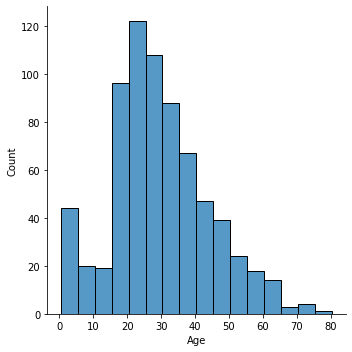

In [3]:
sns.displot(data=passengers, x="Age", kind="hist", binwidth = 5);

Most of the passengers on the Titanic were in their 20s and 30s. // La mayoría de los pasajeros del Titanic tenían entre 20 y 30 años

#### Sex // Género

male      577
female    314
Name: Sex, dtype: int64


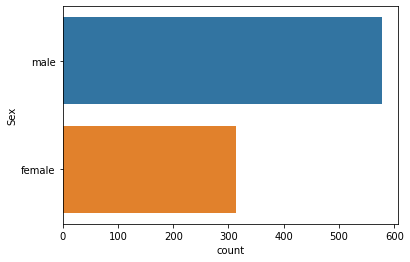

In [4]:
print(passengers.Sex.value_counts())
sns.countplot(data=passengers, y="Sex");

There are almost twice as many male passengers as female passengers. // Hay casi el doble de pasajeros hombre que de pasajeros mujeres.

#### Class // Clases

3    491
1    216
2    184
Name: Pclass, dtype: int64


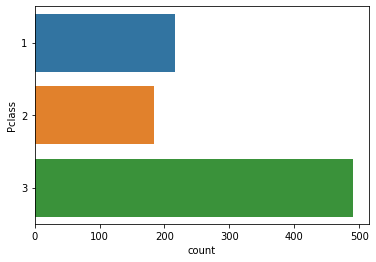

In [5]:
print(passengers.Pclass.value_counts())
sns.countplot(data=passengers, y="Pclass");

Most of the passengers traveled in third class. // La mayoría de los pasajeros viajaban en tercera clase.

#### Survived // Sobreviviente

0    549
1    342
Name: Survived, dtype: int64


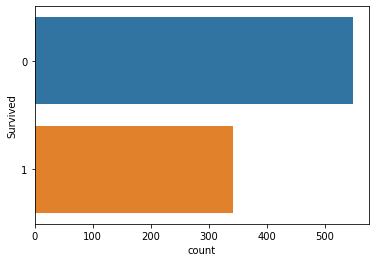

In [6]:
print(passengers.Survived.value_counts())
sns.countplot(data=passengers, y="Survived");

Most passengers did not survive the sinking of the Titanic. // La mayoría de pasajeros no sobrevivió al hundimiento del Titanic.

#### Preprocessing // Preprocesamiento

Preparing the data for modeling is important since it can speed up the process and produce better models. We want to make sure the data we are inputing into our modelling step is good enough to share them.

//

Preparar los datos para el modelado es importante para hacer el más rápido el procesamiento y producir mejores modelo. Queremos asegurarnos de que los datos que ingresamos en nuestro paso de modelado sean lo suficientemente buenos para compartirlos.

In [7]:
cols1 = ['Sex', 'Pclass', 'Survived', 'Age']
df = passengers[cols1].dropna()
for col in cols1[:-2]:
    df = pd.get_dummies(df, columns=[col], prefix = [col])
df

,Survived,Age,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,0,1,0,0,1
1,1,38.0,1,0,1,0,0
2,1,26.0,1,0,0,0,1
3,1,35.0,1,0,1,0,0
4,0,35.0,0,1,0,0,1
...,...,...,...,...,...,...,...
885,0,39.0,1,0,0,0,1
886,0,27.0,0,1,0,1,0
887,1,19.0,1,0,1,0,0
889,1,26.0,0,1,1,0,0


In [8]:
col_length = len(df.columns)

X = df.iloc[:, 1:col_length]
y = df.iloc[:, 0:1]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [10]:
scaler = StandardScaler()
scaler.fit_transform(X_train, y_train)
scaler.transform(X_test)

array([[-0.43082323,  1.31975689, -1.31975689, -0.56269236, -0.57812161,
         0.98212368],
       [ 0.71388432,  1.31975689, -1.31975689, -0.56269236,  1.72973986,
        -1.0182017 ],
       [-0.36348749, -0.75771531,  0.75771531, -0.56269236,  1.72973986,
        -1.0182017 ],
       ...,
       [ 0.24253415,  1.31975689, -1.31975689,  1.77717004, -0.57812161,
        -1.0182017 ],
       [-1.71020224,  1.31975689, -1.31975689, -0.56269236, -0.57812161,
         0.98212368],
       [ 1.52191317, -0.75771531,  0.75771531, -0.56269236,  1.72973986,
        -1.0182017 ]])

### Prediction // Predicción

#### Model Building // Construcción del Modelo

In this project Logistic Regression algorithm will be used to make predictions. // Para este proyecto el algorítmo de Regresión Logística será usado.

In [11]:
model = LogisticRegression()
lr_model = model.fit(X_train, y_train)
lrpredictions = lr_model.predict(X_train) 

In [12]:
print(classification_report(y_train, lrpredictions)) 

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       298
           1       0.76      0.72      0.74       201

    accuracy                           0.80       499
   macro avg       0.79      0.79      0.79       499
weighted avg       0.80      0.80      0.80       499



So it seems that the `Logistic Regression Model` is a good model to predict the survival of a titanic passenger. Its accuracy is 80%. // Parece que el `Modelo de Regresión Logística` puede ser un buen modelo para predecir la sobrevivencia de un pasajero del Titanic. Su precisión es de 80%.

In [13]:
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       126
           1       0.73      0.71      0.72        89

    accuracy                           0.77       215
   macro avg       0.77      0.76      0.76       215
weighted avg       0.77      0.77      0.77       215



In [14]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0)
results = cross_val_score(lr_model, X_train, y_train, cv=kfold, scoring='accuracy')

print(results)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

[0.84       0.81       0.82       0.78       0.72727273]
Baseline: 79.55% (3.92%)


By using cross validation, we get ~80% accuracy which is very good. // Usando la validación cruzada, tenemos aproximadamente un 80% de precision lo cual es muy bueno.

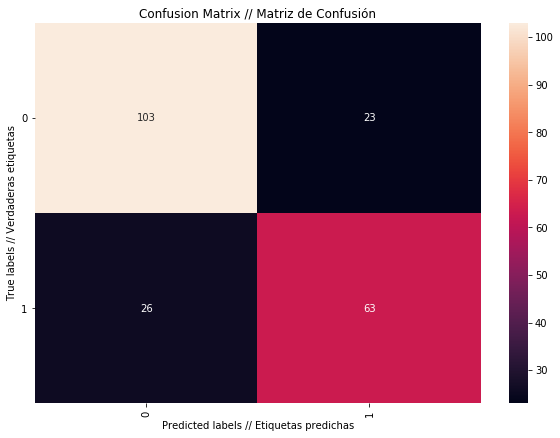

In [15]:
cm = confusion_matrix(y_test, predictions)
lr_labels = lr_model.classes_

plt.figure(figsize=(10,7))

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt="d");

ax.set_xlabel('Predicted labels // Etiquetas predichas');
ax.set_ylabel('True labels // Verdaderas etiquetas'); 
ax.set_title('Confusion Matrix // Matriz de Confusión');
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(lr_labels); 
ax.yaxis.set_ticklabels(lr_labels);

We can clearly see from the confusion matrix that in most cases the predicted labels are the ones that correspond to the real labels. Finally, the model parameters are below.

// 

Podemos observar claramente en la matriz de confusión que en la mayoría de los casos las etiquetas predichas son las que corresponden con las etiquetas reales. Finalmente, los parámetros del modelo se encuentran abajo.

In [17]:
print("Intercept: // Intercepto:", lr_model.intercept_)
print("Coeficientes:", list(zip(X.columns, lr_model.coef_.flatten(), )))
print("Accuracy:", model.score(X, y))

Intercept: // Intercepto: [1.11447576]
Coeficientes: [('Age', -0.03305005311971909), ('Sex_female', 1.2440697172801105), ('Sex_male', -1.2440537556210698), ('Pclass_1', 1.2553756547239485), ('Pclass_2', 0.021227731984122377), ('Pclass_3', -1.276587425048986)]
Accuracy: 0.7899159663865546


### Conclusion // Conclusión


#### General Comments // Comentarios Generales

In this project, Machine Learning was used to predict the survival of a passenger on the Titanic, based on their sex, age and the class in which they were traveling.

Using a logistic regression algorithm, a model was found that can predict with 79% accuracy whether or not the passenger survived the sinking of the Titanic.

//

En este proyecto, el Machine Learning se utilizó para predecir la supervivencia de un pasajero del Titanic, basándose en su sexo, edad y la clase en la que viajaba.

Utilizando un algorítmo de regresión logística, se encontró un modelo  que puede predecir con 79% de precisión si el pasajero sobrevivió o no al hundimiento del Titanic.

#### Next Steps // Próximos Pasos

Next step will be to consider to add additional models or tune the hyper parameters of the used model to see if any more predictive power could be squeezed out of the algorithm. 

//

El siguiente pasos será considerar agregar modelos adicionales o ajustar los hiperparámetros del modelo usados para ver si se podría extraer más poder predictivo del algorítmo.